# Introduction: in this project I choose the 2017 fordgobike data set to analyse and make visulations with.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
#in this project I Choosed 2017 fordgobike dataset.
#read the file
df = pd.read_csv('2017-fordgobike-tripdata.csv')

In [4]:
#check the file
print(df.shape)
print('_________________________________________________________\n')
print(df.dtypes)
print('_________________________________________________________\n')
print(df.info())

(519700, 13)
_________________________________________________________

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
dtype: object
_________________________________________________________

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_sta

In [5]:
#check with .head()
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


# Cleaning Data

In [6]:
#make copy
df_copy = df.copy()

In [7]:
#converte start and end time to date type
df_copy['start_time'] = pd.to_datetime(df_copy['start_time'])
df_copy['end_time'] = pd.to_datetime(df_copy['end_time'])

In [8]:
#seprate the date and the time and make a column for the start date,month, dayOfWeek and hout to help our analysis.
df_copy['start_date'] = df_copy.start_time.dt.strftime('%Y-%m-%d')
df_copy['start_month'] = df_copy.start_time.dt.strftime('%B')
df_copy['start_DayOfWeek'] = df_copy.start_time.dt.strftime('%A')
df_copy['start_hour'] = df_copy.start_time.dt.strftime('%H')

In [9]:
#check the new data
df_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,start_date,start_month,start_DayOfWeek,start_hour
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,2017-12-31,December,Sunday,16
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,2017-12-31,December,Sunday,15
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,2017-12-31,December,Sunday,22
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,2017-12-31,December,Sunday,17
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,2017-12-31,December,Sunday,14


In [10]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  int64         
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  int64         
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  int64         
 12  user_type       

# Exploring the data

## what is more common user type, Customer of Subscriber?

In [11]:
df_copy.user_type.value_counts()

Subscriber    409230
Customer      110470
Name: user_type, dtype: int64

Text(0.5, 0, '')

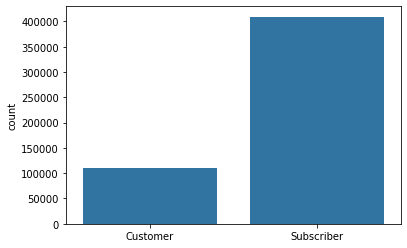

In [12]:
#see the diffrence between the number of customers and subscribers
base_color = sb.color_palette()[0]
sb.countplot(data = df_copy, x = 'user_type', color = base_color);
plt.xlabel('')

### we can the that the number of subscrubers are about 4 times the number of customers

# What is the month people start on the most?

In [13]:
df_copy.start_month.value_counts()

October      108937
September     98558
November      95612
December      86539
August        83292
July          44073
June           2689
Name: start_month, dtype: int64

Text(0, 0.5, 'number of people who starts')

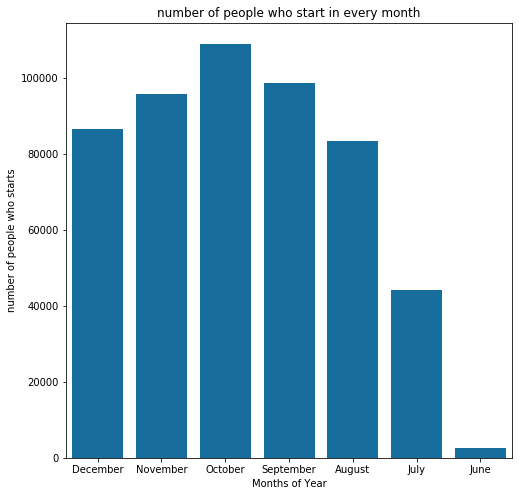

In [14]:
plt.figure(figsize = (8, 8))
base_color = sb.color_palette('colorblind')[0]
sb.countplot(data = df_copy, x = 'start_month', color = base_color)
plt.title('number of people who start in every month')
plt.xlabel('Months of Year')
plt.ylabel('number of people who starts')

### we see that October are the month that most people start on, and june is the least

# What is the day of week people start on the most?

Text(0, 0.5, 'number of people who starts')

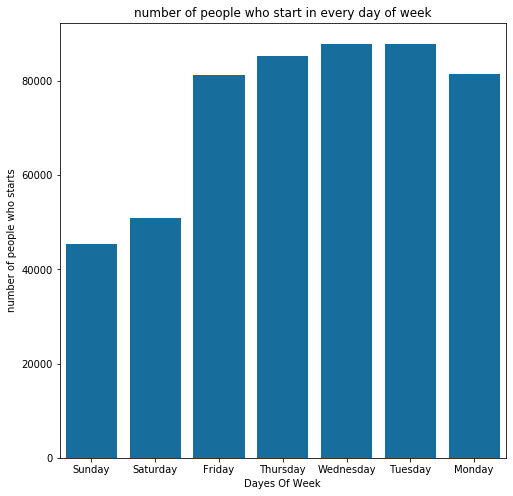

In [15]:
plt.figure(figsize = (8, 8))
base_color = sb.color_palette('colorblind')[0]
sb.countplot(data = df_copy, x = 'start_DayOfWeek', color = base_color)
plt.title('number of people who start in every day of week')
plt.xlabel('Dayes Of Week')
plt.ylabel('number of people who starts')

### we see that wednesday and tuesday are both the most days of week people start on, and monday,thursday and friday are close, but sunday and saturday are less

# in what hour of the day most people start?

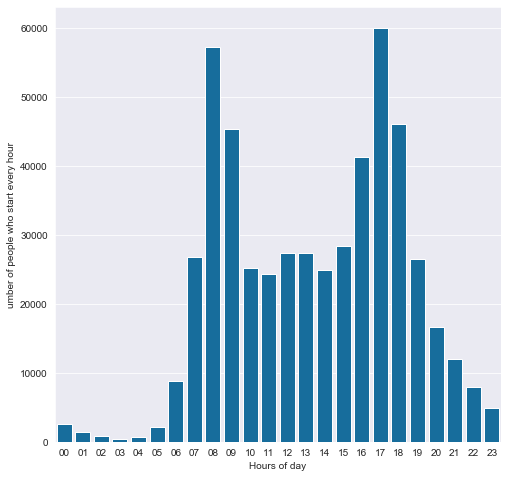

In [30]:
plt.figure(figsize = (8, 8))
sb.countplot(data=df_copy, x='start_hour', color=base_color);
plt.xlabel('Hours of day');
plt.ylabel('umber of people who start every hour');

# we can see that most hour people start in is 18 (or 6 pm), and the second most hour is 8 or (8 am).

# what is the average duration for subscribers and customers?

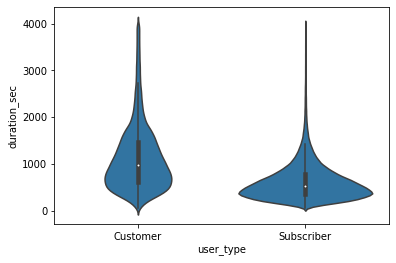

In [24]:
sb.violinplot(data = df_copy.query("duration_sec <= 4000"),x = 'user_type',y='duration_sec',color = sb.color_palette()[0]);

## we can see that the subscribers have less average distance_sec

# in which month we have the most number of customer starts and the most number of subscribers?

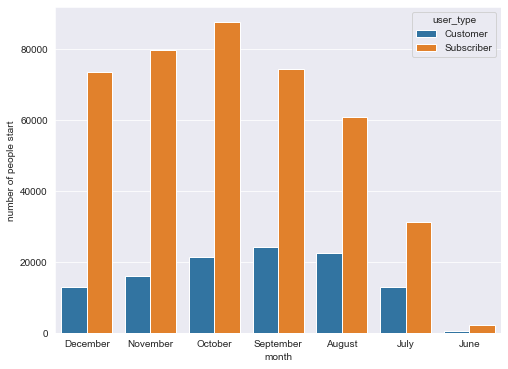

In [35]:
sb.countplot(data=df_copy, x='start_month', hue='user_type');
plt.xlabel('month');
plt.ylabel('number of people start');

## we can see that most subscribers starts in October, and most Customers starts in September.

# in which day of the week we have the most number of customer start and the most number of subscribers?

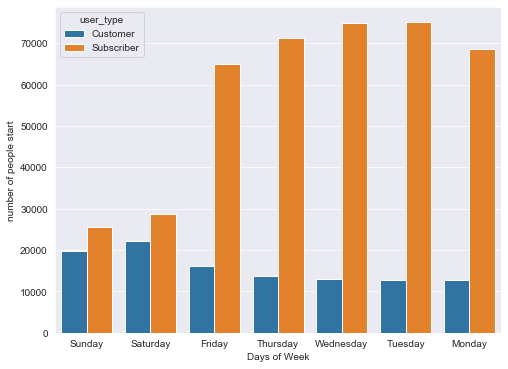

In [33]:
sb.countplot(data=df_copy, x='start_DayOfWeek', hue='user_type');
plt.xlabel('Days of Week');
plt.ylabel('number of people start');

## we can see that most subscribers starts in Tuesday, and most Customers starts in saturday.

## Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

### over all the number of subscribers is a lot more than customers, but the average duration for customers are more than the subscribers average, most people starts on October, and in day of week most of them start in tuesday and wednesday, and in hours of day the most of them starts on 6 pm.

## Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

### while most people starts on octobor, when we take Customers only most of them starts in September, and in days while most people starts in tuesday and wednesday, most customers starts in Saturday.